In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path_prices_volumes ="/Users/tarekchaouch/Desktop/germany/Day-Ahead Auction/Hourly/Current/Prices_Volumes"

In [3]:
power_volume = pd.read_csv(os.path.join(path_prices_volumes, "auction_spot_volumes_germany_luxembourg_2022.csv"),header=1)
prices = pd.read_csv(os.path.join(path_prices_volumes, "auction_spot_prices_germany_luxembourg_2022.csv"),header=1)

In [4]:
prices.dropna(axis=1,thresh=2,inplace=True)
prices.dropna(axis=0,thresh=1,inplace=True)

In [5]:
prices[prices["Minimum"] < -19]

,Delivery day,Hour 1,Hour 2,Hour 3A,Hour 4,Hour 5,Hour 6,Hour 7,Hour 8,Hour 9,...,Peakload,Night,Off-Peak 1,Business,Offpeak,Morning,High Noon,Afternoon,Evening,Sunpeak
47,20/03/2022,84.04,70.99,74.78,68.38,75.9,75.9,68.53,20.56,8.81,...,22.37,75.0,67.39,-5.85,75.71,24.49,-10.32,13.9,102.46,-9.28


In [6]:
prices['Delivery day']= pd.to_datetime(prices['Delivery day'])

In [7]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 0 to 125
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Delivery day     126 non-null    datetime64[ns]
 1   Hour 1           126 non-null    float64       
 2   Hour 2           126 non-null    float64       
 3   Hour 3A          125 non-null    float64       
 4   Hour 4           126 non-null    float64       
 5   Hour 5           126 non-null    float64       
 6   Hour 6           126 non-null    float64       
 7   Hour 7           126 non-null    float64       
 8   Hour 8           126 non-null    float64       
 9   Hour 9           126 non-null    float64       
 10  Hour 10          126 non-null    float64       
 11  Hour 11          126 non-null    float64       
 12  Hour 12          126 non-null    float64       
 13  Hour 13          126 non-null    float64       
 14  Hour 14          126 non-null    float64  

In [8]:
prices["mean_hourly"] = prices.filter(regex='Hour').mean(axis=1)

In [9]:
prices.head()

,Delivery day,Hour 1,Hour 2,Hour 3A,Hour 4,Hour 5,Hour 6,Hour 7,Hour 8,Hour 9,...,Night,Off-Peak 1,Business,Offpeak,Morning,High Noon,Afternoon,Evening,Sunpeak,mean_hourly
0,2022-06-05,220.69,213.74,207.56,204.02,206.57,219.07,255.91,274.92,262.97,...,211.94,225.31,213.02,233.69,257.65,206.84,195.33,249.62,200.73,225.3464
1,2022-05-05,225.20,208.44,208.12,205.09,204.90,220.77,254.96,275.06,268.02,...,212.09,225.32,231.07,235.79,262.75,226.67,215.06,256.20,221.26,234.6020
2,2022-04-05,206.00,200.00,200.34,201.12,201.14,224.32,256.58,296.90,280.10,...,205.49,223.30,222.19,234.22,272.17,210.55,209.38,258.28,207.05,231.6668
3,2022-03-05,184.50,182.09,184.08,185.12,187.04,191.19,236.26,255.96,255.96,...,185.67,200.78,209.81,218.37,245.22,199.85,201.85,255.68,198.30,218.7988
4,2022-02-05,206.46,199.87,194.69,193.76,196.34,209.96,248.88,270.00,264.57,...,200.18,215.00,205.20,224.99,255.61,191.34,194.91,248.01,189.68,219.4116


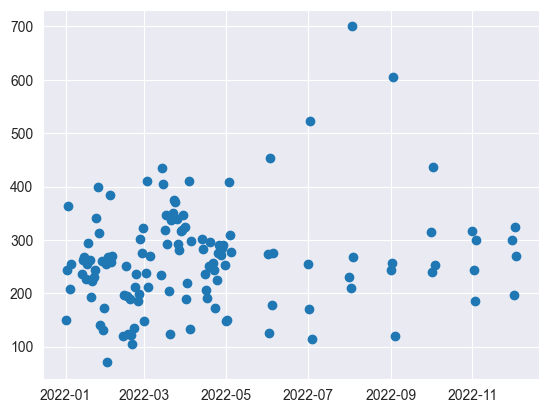

In [10]:
# plot: shows maximum prices according to the delivery day
fig, ax = plt.subplots()

ax.scatter(prices["Delivery day"], prices["Maximum"])

plt.show()

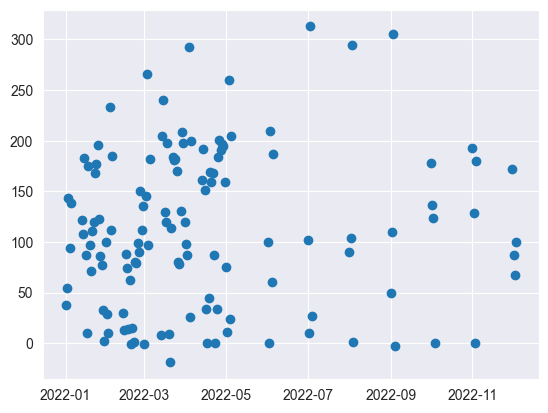

In [11]:
#shows minimum prices according to the delivery day
fig, ax = plt.subplots()

ax.scatter(prices["Delivery day"], prices["Minimum"])

plt.show()

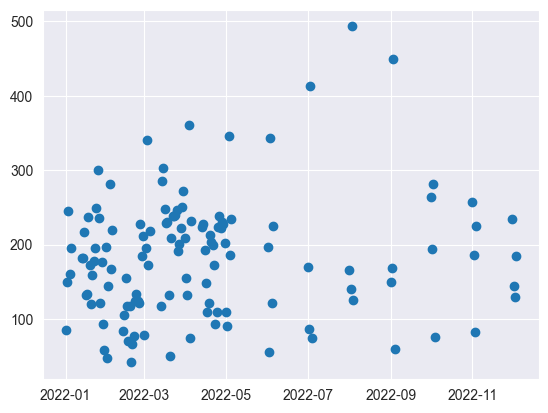

In [12]:
##shows mean prices according to the delivery day
fig, ax = plt.subplots()

ax.scatter(prices["Delivery day"], prices["mean_hourly"])

plt.show()

In [13]:
power_volume.head(10)

,Delivery day,Hour 1,Hour 2,Hour 3A,Hour 3B,Hour 4,Hour 5,Hour 6,Hour 7,Hour 8,...,Hour 16,Hour 17,Hour 18,Hour 19,Hour 20,Hour 21,Hour 22,Hour 23,Hour 24,Total Volume
0,06/05/2022,12919.7,12851.5,12588.1,NaN,12738.3,13219.6,14045.7,15684.7,17864.2,...,22417.9,20924.8,20712.9,20036.3,20492.2,16238.2,16220.9,15767.3,15434.4,440060.1
1,05/05/2022,12392.9,12528.2,13016.0,NaN,12555.0,13043.2,14035.4,16488.6,18498.1,...,21018.6,20168.3,19674.8,18824.3,19291.5,16208.5,15088.2,14626.2,13772.7,424852.5
2,04/05/2022,14173.5,13536.1,14029.8,NaN,13568.8,14067.2,14826.3,17079.7,18649.1,...,21888.3,20107.0,18814.4,18755.5,19171.0,16736.6,15471.0,15305.8,14900.8,442636.8
3,03/05/2022,12711.5,12344.3,12262.6,NaN,12365.9,12501.3,13520.7,16223.1,18053.9,...,23864.1,20745.0,18783.1,19208.6,18836.8,16259.1,15707.9,14331.9,13859.5,442067.5
4,02/05/2022,12521.8,12471.1,12342.3,NaN,12753.8,13371.7,14301.1,18108.2,19069.9,...,24053.4,22928.6,22001.0,20927.3,20299.5,16658.4,16350.2,15413.2,14811.2,466516.4
5,01/05/2022,13629.4,13216.0,13531.1,NaN,13534.4,13382.0,13498.3,14097.8,14747.2,...,21669.4,18596.7,15805.0,15732.9,15523.9,14421.8,14277.7,14115.6,14029.5,399511.4
6,30/04/2022,12205.1,12103.9,12059.4,NaN,12259.3,12220.1,12255.0,13962.9,14482.1,...,16153.3,15064.9,14747.2,14044.9,14990.3,14751.3,14930.4,14505.6,13612.9,351692.1
7,29/04/2022,12788.9,13087.4,13487.5,NaN,13818.6,13975.7,14640.9,17532.1,19594.5,...,22808.7,20624.5,19325.7,19922.4,19592.2,15756.8,15751.4,14913.6,13926.2,449832.4
8,28/04/2022,12971.1,12791.8,12970.7,NaN,13208.1,13528.2,14363.9,16728.0,18139.7,...,25167.1,21822.8,19405.1,18755.4,18483.6,15929.5,15517.3,14810.5,13683.7,454205.0
9,27/04/2022,14439.9,14477.2,14039.2,NaN,14286.2,14873.6,15419.4,17689.3,18771.6,...,23323.7,21095.6,20525.8,20567.5,19932.4,16736.0,16469.3,15862.6,15391.7,460036.5


In [14]:
power_volume.dropna(axis=1,thresh=2,inplace=True)
power_volume.dropna(axis=0,thresh=1,inplace=True)

In [15]:
power_volume.head(5)

,Delivery day,Hour 1,Hour 2,Hour 3A,Hour 4,Hour 5,Hour 6,Hour 7,Hour 8,Hour 9,...,Hour 16,Hour 17,Hour 18,Hour 19,Hour 20,Hour 21,Hour 22,Hour 23,Hour 24,Total Volume
0,06/05/2022,12919.7,12851.5,12588.1,12738.3,13219.6,14045.7,15684.7,17864.2,20037.0,...,22417.9,20924.8,20712.9,20036.3,20492.2,16238.2,16220.9,15767.3,15434.4,440060.1
1,05/05/2022,12392.9,12528.2,13016.0,12555.0,13043.2,14035.4,16488.6,18498.1,19367.6,...,21018.6,20168.3,19674.8,18824.3,19291.5,16208.5,15088.2,14626.2,13772.7,424852.5
2,04/05/2022,14173.5,13536.1,14029.8,13568.8,14067.2,14826.3,17079.7,18649.1,19816.4,...,21888.3,20107.0,18814.4,18755.5,19171.0,16736.6,15471.0,15305.8,14900.8,442636.8
3,03/05/2022,12711.5,12344.3,12262.6,12365.9,12501.3,13520.7,16223.1,18053.9,19711.4,...,23864.1,20745.0,18783.1,19208.6,18836.8,16259.1,15707.9,14331.9,13859.5,442067.5
4,02/05/2022,12521.8,12471.1,12342.3,12753.8,13371.7,14301.1,18108.2,19069.9,21882.4,...,24053.4,22928.6,22001.0,20927.3,20299.5,16658.4,16350.2,15413.2,14811.2,466516.4


In [16]:
power_volume['Delivery day']= pd.to_datetime(power_volume['Delivery day'])


In [17]:
power_volume.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 0 to 125
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Delivery day  126 non-null    datetime64[ns]
 1   Hour 1        126 non-null    float64       
 2   Hour 2        126 non-null    float64       
 3   Hour 3A       125 non-null    float64       
 4   Hour 4        126 non-null    float64       
 5   Hour 5        126 non-null    float64       
 6   Hour 6        126 non-null    float64       
 7   Hour 7        126 non-null    float64       
 8   Hour 8        126 non-null    float64       
 9   Hour 9        126 non-null    float64       
 10  Hour 10       126 non-null    float64       
 11  Hour 11       126 non-null    float64       
 12  Hour 12       126 non-null    float64       
 13  Hour 13       126 non-null    float64       
 14  Hour 14       126 non-null    float64       
 15  Hour 15       126 non-null    float64   

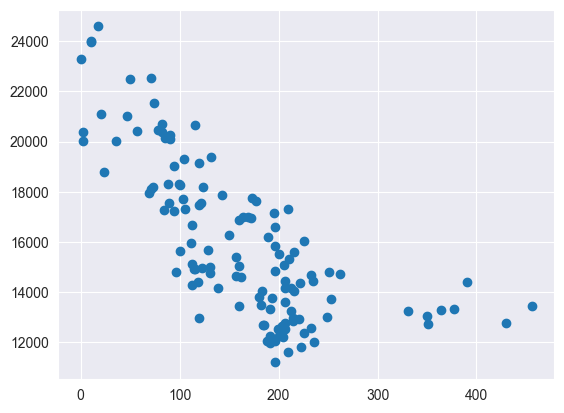

In [18]:
#shows the power volume according to the price in the first hour
fig, ax = plt.subplots()

ax.scatter(prices["Hour 1"], power_volume["Hour 1"])

plt.show()

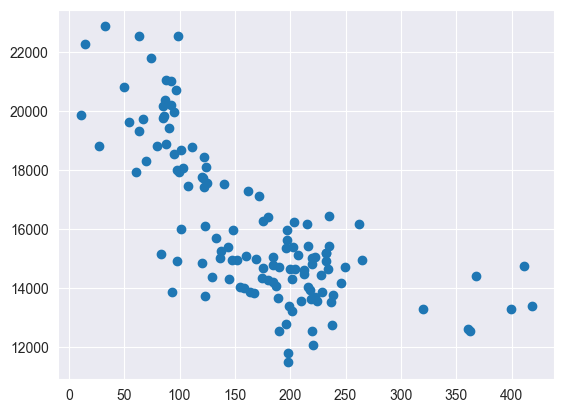

In [19]:
#shows the power volume according to the price in the last hour
fig, ax = plt.subplots()

ax.scatter(prices["Hour 24"], power_volume["Hour 24"])

plt.show()

In [20]:
power_volume["mean_hourly"] = power_volume.filter(regex='Hour').mean(axis=1)
power_volume["Maximum"] = power_volume.filter(regex='Hour').max(axis=1)
power_volume["Minimum"] = power_volume.filter(regex='Hour').min(axis=1)


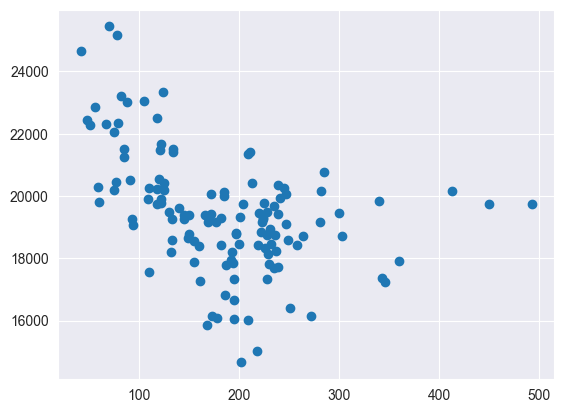

In [21]:
##shows mean power volumes according to the mean prices
fig, ax = plt.subplots()

ax.scatter(prices["mean_hourly"], power_volume["mean_hourly"])

plt.show()

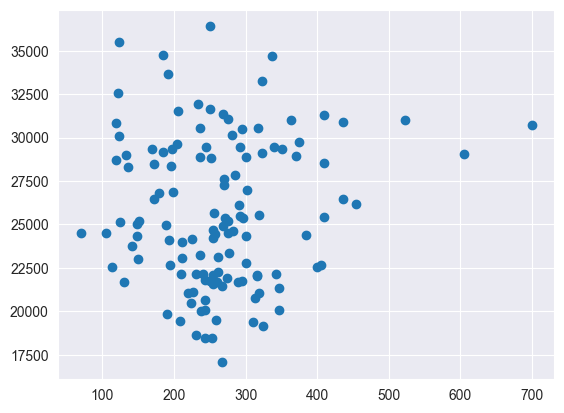

In [22]:
#shows maximum power volumes according to the maximum prices
fig, ax = plt.subplots()

ax.scatter(prices["Maximum"], power_volume["Maximum"])

plt.show()

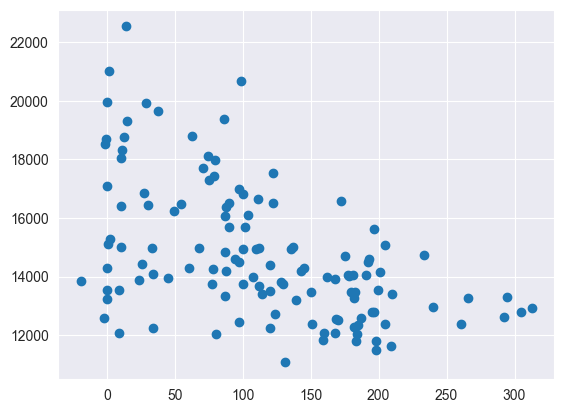

In [23]:
#plots the minimum power volumes according to minimum prices
fig, ax = plt.subplots()

ax.scatter(prices["Minimum"], power_volume["Minimum"])

plt.show()

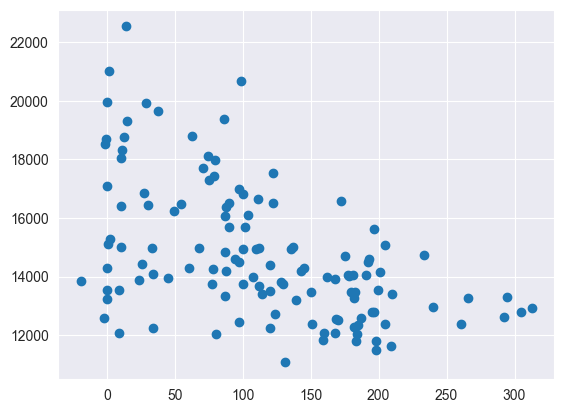

In [24]:
#shows minimum power volumes according to minimum prices in the first hour

fig, ax = plt.subplots()

ax.scatter(prices["Minimum"], power_volume["Minimum"])

plt.show()

In [25]:
r = np.corrcoef(prices["Hour 1"],power_volume["Hour 1"])

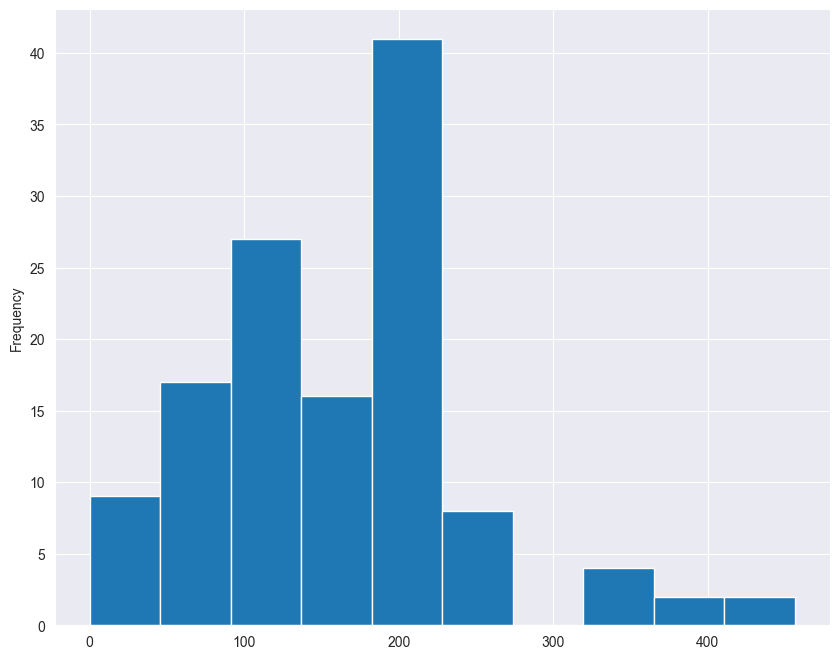

In [26]:
ax = prices["Hour 1"].plot.hist(figsize=(10, 8))
